<a href="https://colab.research.google.com/github/nishant050/learn_pytorch/blob/main/learn_pytorch_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
data = pd.read_csv(url)

In [2]:
data.head()
print(data.species.unique())

#first will convert species to category
data['species'] = pd.Categorical(data['species'],data.species.unique(), ordered = False)

['setosa' 'versicolor' 'virginica']


In [3]:
data['labels'] = data.species.cat.codes

In [4]:
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species  labels
0           5.1          3.5           1.4          0.2  setosa       0
1           4.9          3.0           1.4          0.2  setosa       0
2           4.7          3.2           1.3          0.2  setosa       0
3           4.6          3.1           1.5          0.2  setosa       0
4           5.0          3.6           1.4          0.2  setosa       0


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Model(nn.Module):
  def __init__(self, input_size=4, layer1=8, layer2=9, output=3):
    super().__init__()
    self.h1 = nn.Linear(input_size, layer1)
    self.h2 = nn.Linear(layer1, layer2)
    self.output = nn.Linear(layer2, output)

  def forward(self, x):
    x = F.relu(self.h1(x))
    x = F.relu(self.h2(x))
    x = self.output(x)
    return x



In [7]:
torch.manual_seed(41)
model = Model()

In [8]:
print(data.columns)
dataset = data.drop('species', axis = 1)
print(dataset.head())

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'labels'],
      dtype='object')
   sepal_length  sepal_width  petal_length  petal_width  labels
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [9]:
X = dataset.iloc[:,:4]
Y = dataset.iloc[:,4]
print(X.head(2))
print(Y.head(2))
X = X.values
Y = Y.values

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
0    0
1    0
Name: labels, dtype: int8


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest =  train_test_split(X, Y, shuffle = True, random_state = 41)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [12]:
xtrain = torch.FloatTensor(xtrain)
xtest = torch.FloatTensor(xtest)
ytrain = torch.LongTensor(ytrain)
ytest = torch.LongTensor(ytest)

print(type(xtrain))

<class 'torch.Tensor'>


In [13]:
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [14]:
epochs = 100
losses = []

for i in range(epochs):
  ypred = model.forward(xtrain)
  loss = criteria(ypred, ytrain)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and Loss: {loss.detach().numpy()}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epoch: 0 and Loss: 1.1258066892623901
Epoch: 10 and Loss: 1.0084844827651978
Epoch: 20 and Loss: 0.8143948316574097
Epoch: 30 and Loss: 0.5794722437858582
Epoch: 40 and Loss: 0.39621397852897644
Epoch: 50 and Loss: 0.2684101462364197
Epoch: 60 and Loss: 0.1820579469203949
Epoch: 70 and Loss: 0.12539783120155334
Epoch: 80 and Loss: 0.09006226062774658
Epoch: 90 and Loss: 0.06920257210731506


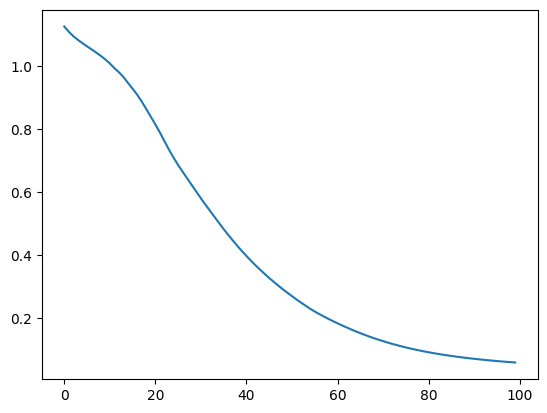

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), losses)

In [19]:
with torch.no_grad():
  pred = model.forward(xtest)
  print(pred)

tensor([[-5.6487,  4.4381,  6.4189],
        [-7.2460,  4.2270,  9.4789],
        [-8.1180,  5.1633,  9.9525],
        [-4.1562,  5.4946,  2.5951],
        [-6.8902,  4.8849,  8.1013],
        [-3.2179,  5.2316,  1.2746],
        [-5.6719,  4.9389,  5.8828],
        [-4.0932,  5.5702,  2.3960],
        [-6.2625,  4.9111,  6.9620],
        [-7.7332,  4.4816, 10.0553],
        [-5.4359,  4.9047,  5.5144],
        [ 4.5532, -2.2157, -2.8584],
        [ 4.2611, -1.9833, -2.7102],
        [-1.9546,  3.9484,  0.5671],
        [ 3.5306, -1.2567, -2.3742],
        [-5.2611,  5.0481,  5.0565],
        [ 4.0498, -1.7685, -2.6216],
        [-5.5818,  4.5777,  6.1526],
        [ 4.4213, -2.1085, -2.7924],
        [ 3.4870, -1.2605, -2.3601],
        [-2.4667,  4.4665,  0.8545],
        [-7.4257,  4.7778,  9.1688],
        [ 3.6542, -1.3757, -2.4415],
        [ 4.5340, -2.2186, -2.8414],
        [-2.4813,  4.5009,  0.8680],
        [-3.1270,  5.1250,  1.2191],
        [-4.4485,  5.6527,  2.9303],
 